In [1]:
from pylab import *
from scipy.optimize import *
from scipy.special import *

In [2]:
rho = linspace(0,15)
J0 = jv(0,rho)
J1 = jv(1,rho)
newton(lambda x: jv(0,x),2)
J0_n = np.zeros(4)
J1_n = np.zeros(4)
J0_n[0] = newton(lambda x: jv(0,x),2)
J1_n[0] = newton(lambda x: jv(1,x),4)
for i in range(len(J0_n)-1):
    J0_n[i+1] = newton(lambda x: jv(0,x), J0_n[i]+pi)
    J1_n[i+1] = newton(lambda x: jv(1,x), J1_n[i]+pi)
J0_n,J1_n

(array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444]),
 array([ 3.83170597,  7.01558667, 10.17346814, 13.32369194]))

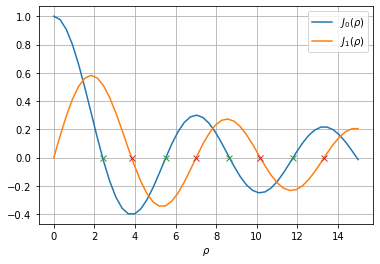

In [3]:
plot(rho,J0,label=r'$J_0 (\rho)$')
plot(rho,J1,label=r'$J_1 (\rho)$')
plot(J0_n , np.zeros(len(J0_n)) , 'x')
plot(J1_n , np.zeros(len(J1_n)) , 'x')
xlabel(r'$\rho$')
legend(),grid()
show()

$$
-\frac{\rho_{i-1/2}}{\sqrt{\rho_i \rho _{i-1}}} \frac{\phi_{i-1}}{\Delta \rho^2} + 
\left[
\frac{ \rho_{i-1/2} + \rho_{i+1/2} }{\rho_i \Delta \rho ^2} - \frac{m^2}{\rho_i ^2} \right] \phi_i -
\frac{\rho_{i+1/2}}{\sqrt{\rho_i \rho _{i+1}}} \frac{\phi_{i+1}}{\Delta \rho^2}
= \epsilon \phi _i
$$

In [83]:
def Ec_radial(rho):
    # valores internos
    delta_rho = rho[1]-rho[0]
    rho_p05 = rho + 0.5*delta_rho
    rho_m05 = rho - 0.5*delta_rho
    N = len(rho)
    A = np.zeros( (N-2,N-2) )
    for i in range(1,N-2):
        A[i-1,i-1] = ( (rho_m05[i]+rho_p05[i])/(rho[i]*delta_rho**2))
        A[i-1,i] = -(rho_p05[i]/(delta_rho**2*sqrt(rho[i]*rho[i+1])))
        A[i,i-1] = -(rho_p05[i]/(delta_rho**2*sqrt(rho[i]*rho[i+1])))
    i = N-1
    A[-1,-1] = ( (rho_m05[i]+rho_p05[i])/(rho[i]*delta_rho**2)
                  - (1/rho[i]**2) )
    return A

In [84]:
r = linspace(0,1,500)
A = Ec_radial(r)
e_val,e_vec = eig(A)
sort(e_val)

array([6.82455220e+00, 3.31178310e+01, 7.92994901e+01, 1.45332261e+02,
       2.31192973e+02, 3.36865157e+02, 4.62335522e+02, 6.07592346e+02,
       7.72624632e+02, 9.57421640e+02, 1.16197258e+03, 1.38626645e+03,
       1.63029187e+03, 1.89403702e+03, 2.17748955e+03, 2.48063657e+03,
       2.80346457e+03, 3.14595941e+03, 3.50810630e+03, 3.88988978e+03,
       4.29129372e+03, 4.71230126e+03, 5.15289486e+03, 5.61305626e+03,
       6.09276647e+03, 6.59200579e+03, 7.11075377e+03, 7.64898925e+03,
       8.20669031e+03, 8.78383431e+03, 9.38039785e+03, 9.99635679e+03,
       1.06316863e+04, 1.12863607e+04, 1.19603536e+04, 1.26536379e+04,
       1.33661858e+04, 1.40979687e+04, 1.48489571e+04, 1.56191210e+04,
       1.64084295e+04, 1.72168510e+04, 1.80443532e+04, 1.88909030e+04,
       1.97564665e+04, 2.06410092e+04, 2.15444957e+04, 2.24668900e+04,
       2.34081552e+04, 2.43682538e+04, 2.53471475e+04, 2.63447973e+04,
       2.73611634e+04, 2.83962052e+04, 2.94498817e+04, 3.05221507e+04,
      